***
## DATA PREPARATION FOR MACHINE LEARNING HOME WORK

## SHIFT ACADEMY DATA SCIENCE BOOTCAMP BATCH 9

by Prayuda Satya Graha
***

The basic objective in making credit decisions is to find ways to approve an order with reasonable expectation that the customer will pay in accordance with established credit terms. A decision to grant or not to grant credit affects sales revenue, profit, production and procurement. If the customer is a good credit risk, the order may be approved as submitted. Otherwise, alternatives should be developed that are acceptable to the credit department
and the sales department—and still meet the customer’s needs.

## Import Library

In [1]:
#import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading Dataset

In [2]:
#loading loan dataset for credit decision
df = pd.read_csv('Loan.csv', sep = ',')

## Data Understanding

In [3]:
#display the first 10 rows of data
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
# let's see how many rows and columns dataset has
df.shape

(614, 13)

In [5]:
# dataset common information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# statistical description of each numerical variables
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Explanations of each variables :
+ Loan ID : Unique loan ID
+ Gender : Applicant's gender (Male / Female)
+ Married : Applicant's Marrital Status (Yes / No)
+ Dependents : Number of Dependents
+ Education : Applicant's Last Education (Graduate / Under Graduate)
+ Self_Employed : Self Employed (Yes / No)
+ ApplicantIncome : Applicant Income
+ CoapplicantIncome : Coapplicant Income
+ LoanAmount : Loan Amount (in thousands)
+ Loan_Amount_Term : Term of Loan (in months)
+ Credit_History : credit history meets guidelines
+ Property_Area : place where applicant lives (Urban / Semi Urban / Rural)
+ Loan_Status : Loan Decision Status Approval (Yes / No)

## Data Cleaning and Pre-Processing

### Check Duplicate Data

In [7]:
# drop duplicate value
df.drop_duplicates(inplace = True)

In [8]:
# check number of rows after dropping duplicate
df.shape

(614, 13)

### Check Data Types of each variables

In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
df['ApplicantIncome'] = df['ApplicantIncome'].astype('float64')
df['ApplicantIncome'].dtype

dtype('float64')

In [11]:
df['Credit_History'] = df['Credit_History'].astype('O')
df['Credit_History'].dtype

dtype('O')

In [12]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

### Check Missing Values

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Handling Missing Values of Categorical Variables

In [14]:
# checking most common gender of applicant
print(df['Gender'].value_counts())
mostcommongender = df['Gender'].value_counts().index[0]

# filling missing value of Gender variable with most common applicant gender
df['Gender'] = df['Gender'].fillna(mostcommongender)
print('\nGender missing values: %s' % df['Gender'].isnull().sum())

Male      489
Female    112
Name: Gender, dtype: int64

Gender missing values: 0


In [15]:
# checking most common applicants marrital status 
print(df['Married'].value_counts())
mostcommonmarried = df['Married'].value_counts().index[0]

# filling missing value of Married variable with most common applicant marrital status
df['Married'] = df['Married'].fillna(mostcommonmarried)
print('\nMarried missing values: %s' % df['Married'].isnull().sum())

Yes    398
No     213
Name: Married, dtype: int64

Married missing values: 0


In [16]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# checking most common number of applicants dependents
print(df['Dependents'].value_counts())
mostcommondependents = df['Dependents'].value_counts().index[0]

# filling missing value of Dependents variable with most common number of applicant's Dependents
df['Dependents'] = df['Dependents'].fillna(mostcommondependents)
print('\nDependents missing values: %s' % df['Dependents'].isnull().sum())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Dependents missing values: 0


In [18]:
# checking most common applicants Employement status
print(df['Self_Employed'].value_counts())
mostcommonselfemployed = df['Self_Employed'].value_counts().index[0]

# filling missing value of Self_Employed variable with most common applicant's Employement status
df['Self_Employed'] = df['Self_Employed'].fillna(mostcommonselfemployed)
print('\nSelf_Employed missing values: %s' % df['Self_Employed'].isnull().sum())


No     500
Yes     82
Name: Self_Employed, dtype: int64

Self_Employed missing values: 0


In [19]:
# checking most common term of loan
print(df['Loan_Amount_Term'].value_counts())
mostcommonterm = df['Loan_Amount_Term'].value_counts().index[0]

# filling missing value of Loan_Amount_Term variable with most common term
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(mostcommonterm)
print('\nLoan_Amount_Term missing values: %s' % df['Loan_Amount_Term'].isnull().sum())

# changing Loan_Amount_Term variables data type into int64
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int64')
print('\n')
print('Loan_Amount_Term data type: {}'.format(df['Loan_Amount_Term'].dtype))
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Loan_Amount_Term missing values: 0


Loan_Amount_Term data type: int64


360    526
180     44
480     15
300     13
84       4
240      4
120      3
36       2
60       2
12       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
# checking most common credit history approval (1 = yes, 0 = no)
print(df['Credit_History'].value_counts())
mostcommonhist = df['Credit_History'].mode()[0]

# filling missing value of Credit_History with most common credit history approval
df['Credit_History'] = df['Credit_History'].fillna(mostcommonhist)
print('\nCredit_History missing values: {}'.format(df['Credit_History'].isnull().sum()))

# change Credit_History data type into int64
df['Credit_History'] = df['Credit_History'].astype('int64')
print('\n')
print('Credit_History data type: {}'.format(df['Credit_History'].dtype))
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Credit_History missing values: 0


Credit_History data type: int64


1    525
0     89
Name: Credit_History, dtype: int64

### Handling Missing Values of Numerical Variables

In [21]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

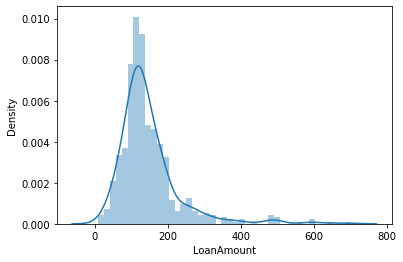

In [22]:
# checking the distribution of LoanAmount variable with histogram and density plot
sns.distplot(df['LoanAmount'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

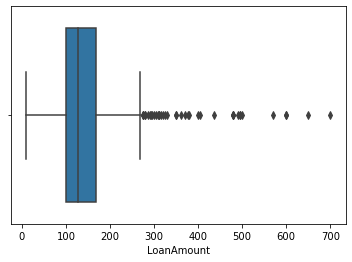

In [23]:
# checking the distribution of LoanAmount variable with boxplot
sns.boxplot(df['LoanAmount'])

In [24]:
# since LoanAmount variable has positive skewed, we should fill missing values with median
medianloan = df['LoanAmount'].median()
df['LoanAmount'] = df['LoanAmount'].fillna(medianloan)

print('\nLoanAmount missing values: {}'.format(df['LoanAmount'].isnull().sum()))


LoanAmount missing values: 0


In [25]:
# data types final check
print('dataset type check:')
print(df.dtypes)
print('\n')

# missing values final check
print('missing values check:')
print(df.isnull().sum())
print('\n')

# NA check 
print('NA check:')
print(df.isna().sum())

dataset type check:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object


missing values check:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


NA check:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_Hist

## Outliers Detection

In [26]:
# make function to detect outliers
def outlier(sample):
    Q1 = sample.quantile(0.25)
    Q3 = sample.quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    number_outlier = len(sample[sample < lower_range]) + len(sample[sample > upper_range])
    print('Number of outliers : {}'.format(number_outlier))
    if number_outlier > 0:
        print('Outliers observation row:')
    else:
        pass
    for i in range(len(sample)):
        if sample[i] > upper_range:
            print(i)
        elif sample[i] < lower_range:
            print(i)
        else:
            pass

### Check all non categoric variable

In [27]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

In [28]:
# check outlier from ApplicantIncome variable
outlier(df['ApplicantIncome'])

Number of outliers : 50
Outliers observation row:
9
34
54
67
102
106
115
119
126
128
130
138
144
146
155
171
183
185
191
199
254
258
271
278
284
308
324
333
369
370
409
424
432
438
443
467
475
478
483
487
493
506
509
525
533
534
561
572
594
604


In [29]:
# check outlier from CoapplicantIncome variable
outlier(df['CoapplicantIncome'])

Number of outliers : 18
Outliers observation row:
9
12
38
122
135
177
180
253
349
372
402
417
444
506
513
523
581
600


In [30]:
# check outlier from LoanAmount variable
outlier(df['LoanAmount'])

Number of outliers : 41
Outliers observation row:
5
9
21
34
54
67
83
126
130
135
155
161
171
177
233
253
258
260
278
308
324
325
333
351
369
372
381
391
409
432
487
506
514
523
525
536
561
572
592
600
604


In [31]:
# observe the outliers from ApplicantIncome
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
df.loc[((df['ApplicantIncome'] < lower_bound) | (df['ApplicantIncome'] > upper_bound)), :].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841.0,10968.0,349.0,360,1,Semiurban,N
34,LP001100,Male,No,3+,Graduate,No,12500.0,3000.0,320.0,360,1,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500.0,0.0,286.0,360,0,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750.0,0.0,312.0,360,1,Urban,Y
102,LP001350,Male,Yes,0,Graduate,No,13650.0,0.0,128.0,360,1,Urban,Y


In [32]:
# Replace outlier observations with upper bound and lower bound
df.loc[(df["ApplicantIncome"] > upper_bound), "ApplicantIncome"] = upper_bound
df.loc[(df["ApplicantIncome"] < lower_bound), "ApplicantIncome"] = lower_bound

# check again the outliers
outlier(df['ApplicantIncome'])

Number of outliers : 0


In [33]:
# observe the outliers from CoapplicantIncome
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
df.loc[((df['CoapplicantIncome'] < lower_bound) | (df['CoapplicantIncome'] > upper_bound)), :].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,10171.25,10968.0,349.0,360,1,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073.00,8106.0,200.0,360,1,Urban,Y
38,LP001114,Male,No,0,Graduate,No,4166.00,7210.0,184.0,360,1,Urban,Y
122,LP001431,Female,No,0,Graduate,No,2137.00,8980.0,137.0,360,0,Semiurban,Y
135,LP001488,Male,Yes,3+,Graduate,No,4000.00,7750.0,290.0,360,1,Semiurban,N


In [34]:
# Replace outlier observations with upper bound and lower bound
df.loc[(df["CoapplicantIncome"] > upper_bound), "CoapplicantIncome"] = upper_bound
df.loc[(df["CoapplicantIncome"] < lower_bound), "CoapplicantIncome"] = lower_bound

# check again the outliers
outlier(df['CoapplicantIncome'])

Number of outliers : 0


In [35]:
# observe the outliers from LoanAmount
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
df.loc[((df['LoanAmount'] < lower_bound) | (df['LoanAmount'] > upper_bound)), :].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,LP001011,Male,Yes,2,Graduate,Yes,5417.00,4196.000,267.0,360,1,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,10171.25,5743.125,349.0,360,1,Semiurban,N
21,LP001046,Male,Yes,1,Graduate,No,5955.00,5625.000,315.0,360,1,Urban,Y
34,LP001100,Male,No,3+,Graduate,No,10171.25,3000.000,320.0,360,1,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,10171.25,0.000,286.0,360,0,Urban,N


In [36]:
# Replace outlier observations with upper bound and lower bound
df.loc[(df["LoanAmount"] > upper_bound), "LoanAmount"] = upper_bound
df.loc[(df["LoanAmount"] < lower_bound), "LoanAmount"] = lower_bound

# check again the outliers
outlier(df['LoanAmount'])

Number of outliers : 0


In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360,1,Urban,Y


## Feature Scaling

### Encoding Variables

In [48]:
from sklearn.preprocessing import LabelEncoder

df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      458
CoapplicantIncome    271
LoanAmount           168
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder

#Separating categorical and numerical columns
Id_col     = ['Loan_ID']
target_col = ['Loan_Status']
cat_cols   = df.nunique()[df.nunique() < 11].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()

#multinomial columns
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
    
#Label encoding for nominal multi value columns
df=pd.get_dummies(data = df,columns = multi_cols,drop_first=True)

In [54]:
df

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,...,Loan_Amount_Term_60,Loan_Amount_Term_84,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_360,Loan_Amount_Term_480,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,5849.0,0.0,128.0,1,1,...,0,0,0,0,0,0,1,0,0,1
1,LP001003,1,1,0,0,4583.0,1508.0,128.0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,LP001005,1,1,0,1,3000.0,0.0,66.0,1,1,...,0,0,0,0,0,0,1,0,0,1
3,LP001006,1,1,1,0,2583.0,2358.0,120.0,1,1,...,0,0,0,0,0,0,1,0,0,1
4,LP001008,1,0,0,0,6000.0,0.0,141.0,1,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,2900.0,0.0,71.0,1,1,...,0,0,0,0,0,0,1,0,0,0
610,LP002979,1,1,0,0,4106.0,0.0,40.0,1,1,...,0,0,0,1,0,0,0,0,0,0
611,LP002983,1,1,0,0,8072.0,240.0,253.0,1,1,...,0,0,0,0,0,0,1,0,0,1
612,LP002984,1,1,0,0,7583.0,0.0,187.0,1,1,...,0,0,0,0,0,0,1,0,0,1


## Data Partition

In [57]:
from sklearn.model_selection import train_test_split

##partitioning data into data training and data testing
train,test = train_test_split(df,test_size = .20 ,random_state = 99)
    
##seperating dependent and independent variables on training and testing data
cols    = [i for i in df.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

## Synthetic Minority Over-sampling Technique (SMOTE)

In [62]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 99,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=cols)
train_smote_Y = pd.DataFrame(data = train_smote_Y,columns=target_col)

In [64]:
#Proportion before smote
train_Y["Loan_Status"].value_counts()

1    340
0    151
Name: Loan_Status, dtype: int64

In [65]:
#Proportion after smote
train_smote_Y["Loan_Status"].value_counts()

0    340
1    340
Name: Loan_Status, dtype: int64